# Intro to Data Visualization with Python - Part 2

## Content
#### 1. Import libraries and data
#### 2. Rename and rearrange days in the week
#### 3. Create charts from exercise
#### 3.1. Create bar chart for column 'orders_day_of_week'
#### 3.2. Create histogram for column 'prices'
#### 3.3. Create scatterplot
#### 3.4 Create line chart for columns 'orders_day_of_week' and 'prices' on 30% sample
#### 4. Create histogram for column 'order_hour_of_day'
#### 5. Create bar chart for column 'loyalty_flag'
#### 6. Check for difference in expenditure depending on the hour of the day
#### 7. Explore connection between age of customers and number of dependants (with line chart)
#### 8. Explore connection between age and income (with scatterplot)
#### 9. Export data

# 1. Import libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create project folder path
path = r'C:\Users\Lara\Career Foundry Projects\21-09-2023 Instacart Basket Analysis'

In [3]:
# Import dataset orders_products_all.pkl
df_all = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Check head() and shape
df_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,order_frequency_flag,first_name,surname,gender,state,age,number_of_dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423


In [5]:
df_all.shape

(32434212, 30)

# 2. Rename and rearrange days in the week

#### It would be more intuitive to rename days of the week from numbers to actual names and to rearrange them when presenting results and making charts to follow order of days in the week as it is custom in USA and Canada (where week begins with Sunday and ends with Saturday). I'll prerform all the changes on deep copy of current dataframe, just in case we need original setting of days in the week.

In [6]:
# Make a hard copy of df_all
df_all_2 = df_all.copy(deep = True)

In [7]:
# Change data type of column 'orders_day_of_week' in df_all_2 to string
df_all_2['orders_day_of_week'] = df_all_2['orders_day_of_week'].astype('str')

In [8]:
df_all_2['orders_day_of_week'].dtype

dtype('O')

In [9]:
# Create dictionary of replacements
days = {'0' : 'Saturday', '1' : 'Sunday', '2' : 'Monday', '3' : 'Tuesday', '4' : 'Wednesday', '5' : 'Thursday', '6' : 'Friday'}

In [10]:
# Change all days in dataframe
df_all_2['orders_day_of_week'] = df_all_2['orders_day_of_week'].map(days).fillna(df_all_2['orders_day_of_week'])

In [11]:
# Check if all changes happened
df_all_2['orders_day_of_week'].value_counts()

orders_day_of_week
Saturday     6209632
Sunday       5665830
Friday       4500246
Monday       4217766
Thursday     4209449
Tuesday      3844096
Wednesday    3787193
Name: count, dtype: int64

In [12]:
df_all_2['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
Friday       4500246
Monday       4217766
Saturday     6209632
Sunday       5665830
Thursday     4209449
Tuesday      3844096
Wednesday    3787193
Name: count, dtype: int64

#### This shows that sorting days with 'sort_index' just sort them alphabethically

In [13]:
# Create a custom made dictionary for new order/arrangement for days in the week
arrange_days = {'Sunday' : 0, 'Monday' : 1, 'Tuesday' : 2, 'Wednesday' : 3, 'Thursday' : 4, 'Friday' : 5, 'Saturday' : 6} 

In [14]:
# Sort entire dataframe by column 'orders_day_of_week' and sort by custom made dictionary arrange_days
# df_all_2.sort_values(by = ['orders_day_of_week'], key = lambda x: x.map(arrange_days))

In [15]:
# Count all values in column 'orders_day_of week' and sort by custom made dictionary arrange_days
df_all_2['orders_day_of_week'].value_counts().sort_index(key = lambda x: x.map(arrange_days))

orders_day_of_week
Sunday       5665830
Monday       4217766
Tuesday      3844096
Wednesday    3787193
Thursday     4209449
Friday       4500246
Saturday     6209632
Name: count, dtype: int64

# 3. Create charts from exercise

## 3.1. Create bar chart for column 'orders_day_of_week'

### Old dataset

<Axes: xlabel='orders_day_of_week'>

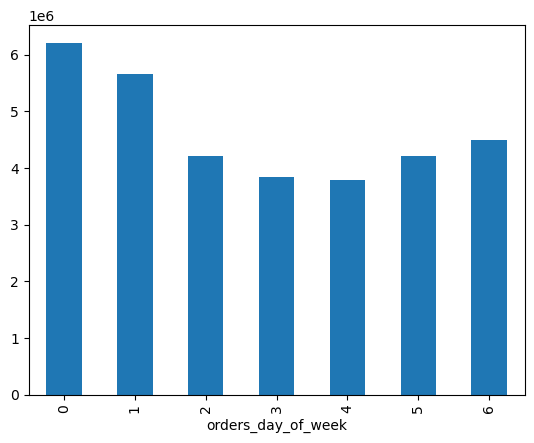

In [16]:
# Create bar chart for 'orders_day_of_week'
df_all['orders_day_of_week'].value_counts().sort_index().plot.bar()

### New dataset with renamed and rearranged days

<Axes: title={'center': 'FREQUENCY OF ITEMS BOUGHT BY DAYS OF THE WEEK'}, xlabel='days of the week', ylabel='number of items bought (in millions)'>

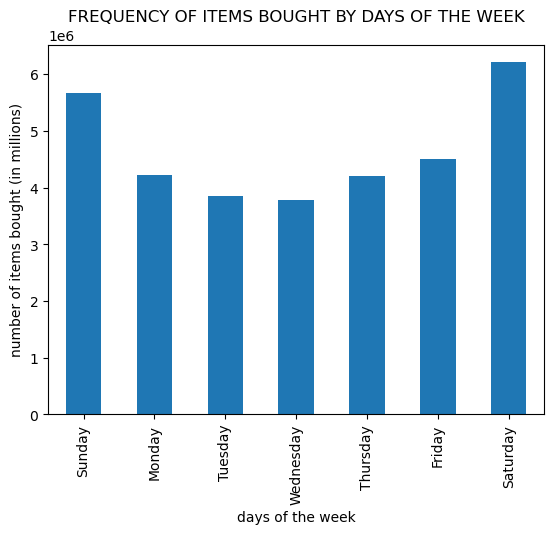

In [17]:
# Create bar chart for 'orders_day_of_week'
df_all_2['orders_day_of_week'].value_counts().sort_index(key = lambda x: x.map(arrange_days)).plot.bar(title = 'FREQUENCY OF ITEMS BOUGHT BY DAYS OF THE WEEK', xlabel = 'days of the week', ylabel = 'number of items bought (in millions)')

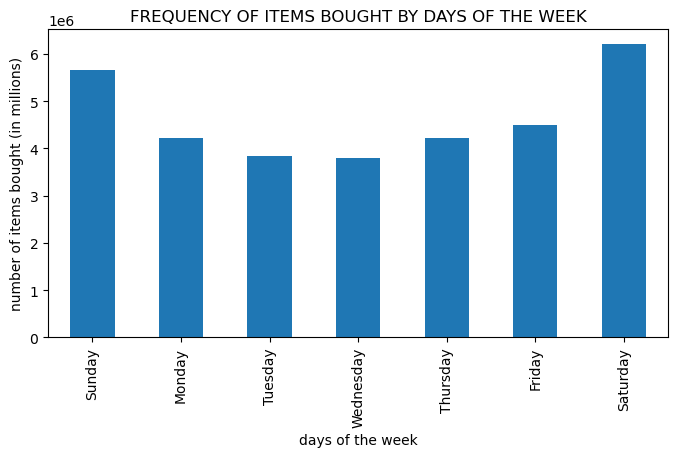

In [66]:
# Save bar chart to Jupyter's memory
bar_new = df_all_2['orders_day_of_week'].value_counts().sort_index(key = lambda x: x.map(arrange_days)).plot.bar(figsize = (8, 4), title = 'FREQUENCY OF ITEMS BOUGHT BY DAYS OF THE WEEK', xlabel = 'days of the week', ylabel = 'number of items bought (in millions)')

In [69]:
# Save object bar_new as image file
bar_new.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_new_orders_dow.png'), bbox_inches = 'tight')

## 3.2. Create histogram for column 'prices'

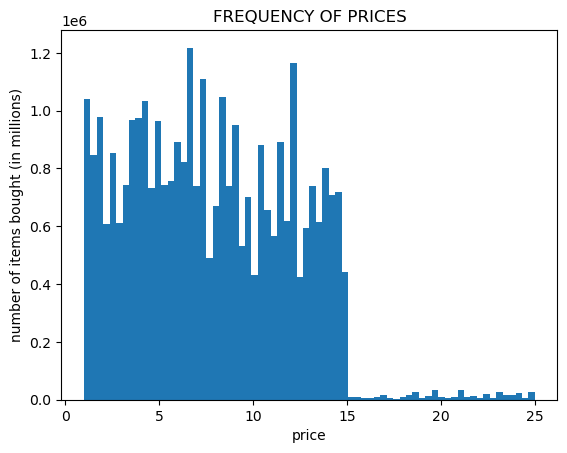

In [20]:
# Create histogram for column 'prices' and save it to Jupyter's memory
hist = df_all_2['prices'].plot.hist(bins = 70, title = 'FREQUENCY OF PRICES', xlabel = 'price', ylabel = 'number of items bought (in millions)')

In [70]:
# Save object hist as image file
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices.png'), bbox_inches = 'tight')

## 3.3. Create scatterplot

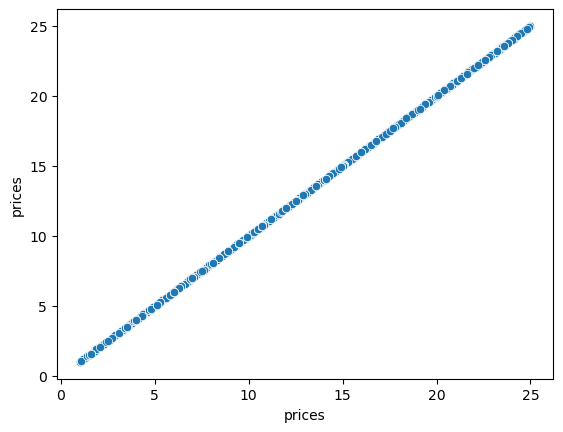

In [22]:
# Create scatterplot and save it to Jupyter's memory
sc_plot = sns.scatterplot(x = 'prices', y = 'prices', data = df_all_2)

In [23]:
# Save object sc_plot as image file
sc_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sc_plot_prices.png'))

#### This scatterplot doesn't show any insights, but it was useful in finding outliers in 4.9 Exercise and a part of code was transfered to notebook from task 4.8 to remove those values.

## 3.4 Create line chart for columns 'orders_day_of_week' and 'prices' on 30% sample

### Create sample

In [24]:
# Set seed and create list holding True/False values to store results of test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df_all_2)) <= 0.7

In [25]:
# Store 70% sample in dataframe big
big = df_all_2[dev]

In [26]:
# Store 30% sample in dataframe small
small = df_all_2[~dev]

In [27]:
# Check if if split was done correctly. If value is True than it is correct
print(len(df_all_2) == (len(big) + len(small)))

True


In [28]:
# Reduce sample size by only looking into 2 columns
df_small = small[['orders_day_of_week','prices']]

### Create line chart

In [29]:
# Rearrange days in column 'orders_day_of_week'
df_small_2 = df_small.sort_values( by = ['orders_day_of_week'], key = lambda x: x.map(arrange_days))

Text(0.5, 1.0, 'FLUCTUATION OF PRICES BY DAY OF THE WEEK')

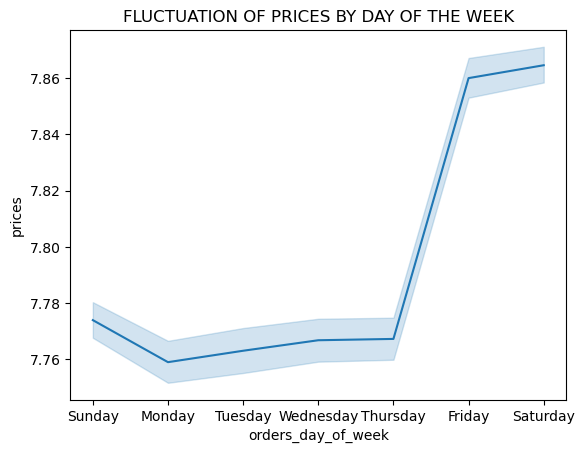

In [34]:
# Create line chart and save it to Jupyter's memory
line_new = sns.lineplot(data = df_small_2, x = 'orders_day_of_week', y = 'prices')
plt.title('FLUCTUATION OF PRICES BY DAY OF THE WEEK')

In [71]:
# Save object line_new as image file
line_new.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_new.png'), bbox_inches = 'tight')

#### Line chart looks different than in 4.9 Exercise because I changed the order of days. In exercise old version of dataset was used where days were represented with 0, 1, ..., 6 and 0 represented Saturday, 1 was Sunday, ..., 6 was Friday. Now week starts with Sunday and ends with Saturday

# 4. Create histogram for column 'order_hour_of_day'

#### I decided that bin width should be 5, because according to the "square-root rule" bin width should be sqrt(data points). In this case I rounded sqrt(24) = 4,898979 to 5.

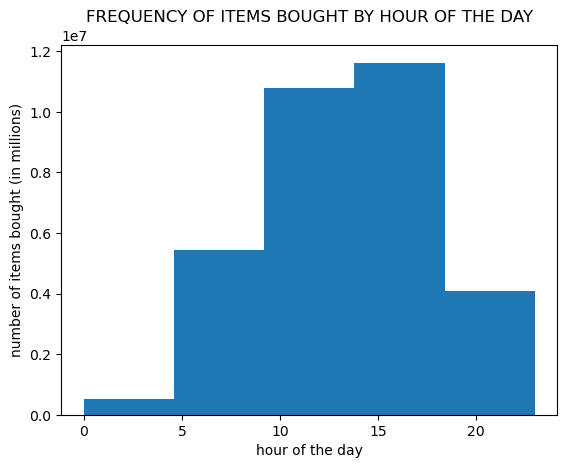

In [36]:
# Create histogram for column 'order_hour_of_day' and save it to Jupyter's memory
hist_ord_hour = df_all_2['order_hour_of_day'].plot.hist(bins = 5, title = 'FREQUENCY OF ITEMS BOUGHT BY HOUR OF THE DAY', xlabel = 'hour of the day', ylabel = 'number of items bought (in millions)')

In [72]:
# Save object hist as image file
hist_ord_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_ord_hour.png'), bbox_inches = 'tight')

#### Histogram shows that the peak in sales happened between 2 and 4 pm and that the biggest volume of sales happens between 8 am and 4 pm. Least amout of sales happened between midnight and 6 am.

# 5. Create bar chart for column 'loyalty_flag'

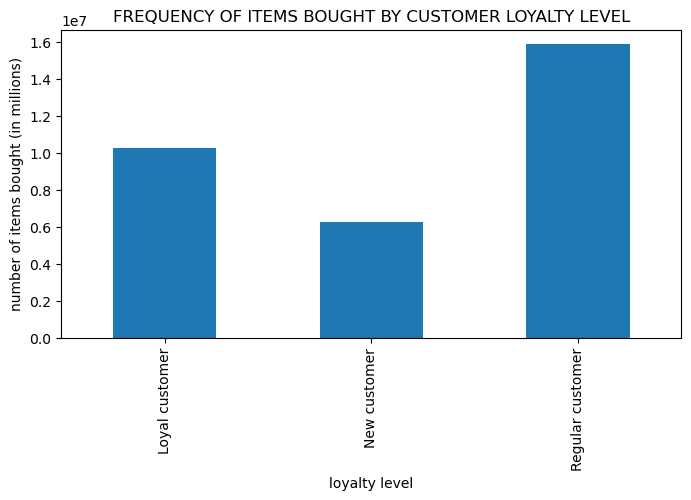

In [79]:
# Create bar chart for 'loyalty_flag'
bar_loyalty = df_all_2['loyalty_flag'].value_counts().sort_index().plot.bar(figsize = (8, 4), title = 'FREQUENCY OF ITEMS BOUGHT BY CUSTOMER LOYALTY LEVEL', xlabel = 'loyalty level', ylabel = 'number of items bought (in millions)')

In [80]:
# Save object bar_loyalty as image file
bar_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyalty.png'), bbox_inches = 'tight')

#### Bar chart shows that majority of customers belong to group Regular customer (about 16 million), followed by Loyal customer group with about 10 million users. I can conclude that people do come back to Instacart and in time become loyal customers.

# 6. Check for difference in expenditure depending on the hour of the day

#### I will use the same sample small as for previous line chart, that is a subset of randomly choosen 30% rows with seed set to 4. This sample was shown in 4.9 Exercise to be accurate for line chart depicting columns 'orders_day-of_week' and 'prices'.

In [40]:
# Create smaller subset from 'small' and include only 2 columns needed for line chart
df_small_hour_price = small[['order_hour_of_day','prices']]

Text(0, 0.5, 'price')

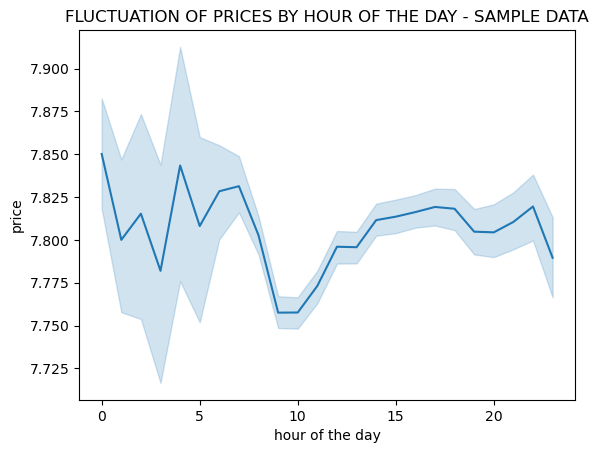

In [41]:
# Create line chart and save it to Jupyter's memory
line_price_hour = sns.lineplot(data = df_small_hour_price, x = 'order_hour_of_day', y = 'prices')
plt.title('FLUCTUATION OF PRICES BY HOUR OF THE DAY - SAMPLE DATA')
plt.xlabel('hour of the day')
plt.ylabel('price')

#### It looks like during late night hours and earlu mornings people tend to buy more higher priced items, and around 9-11 am they buy more  low priced items. This looks a bit strange. I'll check other sample 'big' to see if line chart for that subset will look similar.

In [42]:
df_big_hour_price = big[['order_hour_of_day','prices']]

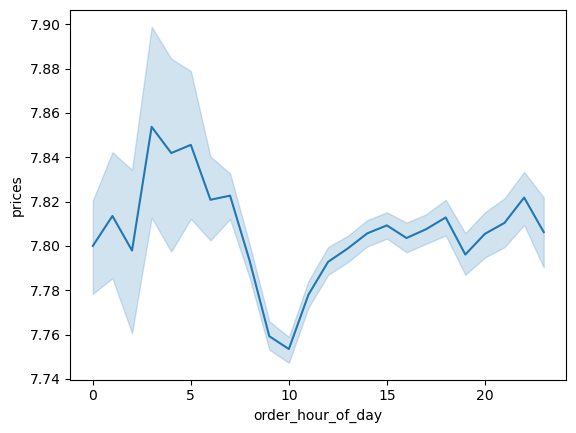

In [43]:
line_price_hour_2 = sns.lineplot(data = df_big_hour_price, x = 'order_hour_of_day', y = 'prices')

#### These 2 line charts don't look  the same but they show similar trends described above. I can conclude that sample small is accurate enough for this line chart too.

In [74]:
# Save object line_price_hour as image file
line_price_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_price_hour.png'), bbox_inches = 'tight')

# 7. Explore connection between age of customers and number of dependants (with line chart)

In [45]:
# Create smaller subset from sample small with just 2 columns necessary for line chart
df_small_age_depends = small[['age', 'number_of_dependants']]

Text(0, 0.5, 'number of dependants')

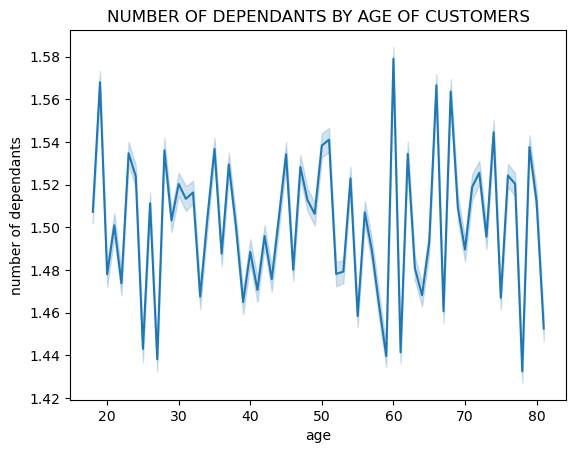

In [48]:
# Create line chart and save it to Jupyter's memory
line_age_depends = sns.lineplot(data = df_small_age_depends, x = 'age', y = 'number_of_dependants')
plt.title('NUMBER OF DEPENDANTS BY AGE OF CUSTOMERS')
plt.ylabel('number of dependants')

#### From this line chart I can only deduce that it doesn't really matter what age users are because at almost every age group of for example 10 years we see that there are families of all sizes. This should be further investigated, by making 10-year age groups or similar.

In [75]:
# Save object line_price_hour as image file
line_age_depends.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'), bbox_inches = 'tight')

# 8. Explore connection between age and income (with scatterplot)

Text(0.5, 1.0, 'INCOME BY AGE OF COSTUMERS')

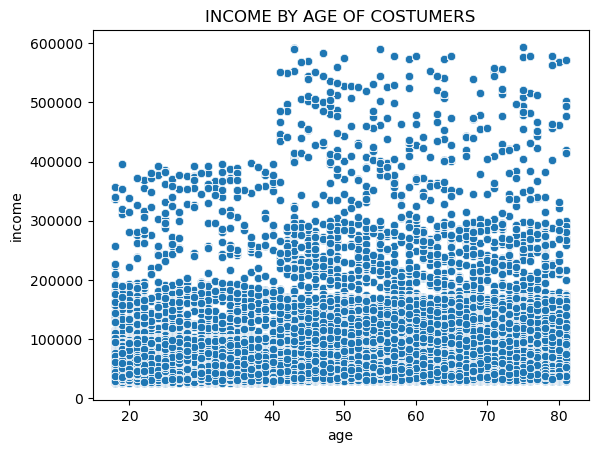

In [77]:
# Create scatterplot and save it to Jupyter's memory
sc_age_income = sns.scatterplot(x = 'age', y = 'income', data = df_all_2)
plt.title('INCOME BY AGE OF COSTUMERS')

In [78]:
# Save object sc_age_income as image file
sc_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'sc_age_income.png'), bbox_inches = 'tight')

#### This scatterplot shows that majority of users younger than 45 years earn less than 200 K, and there are no users with income over 400 K. And fo those older that 45 a lot of them earn up to 300 K, still majority of them earn less than 200 K and we also have users that earn up to around 600 K.

# 9. Export data

In [81]:
# Export df_merge_out as pikle format
df_all_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_customers_with_dow_names.pkl'))